In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For plotting graphs

'This dataset captures comprehensive metrics and demographics related to player behavior in online gaming environments. It includes variables such as player demographics, game-specific details, engagement metrics, and a target variable reflecting player retention.'

I want to explore how game difficulty, gamers’ engagement level and preferred genres (qualitative factors) relate to their actual playing behavior (time) and in-game spending (quantitative outcomes). My goal is to build predictive models to identify the qualitative predictors of high engagement or risk of addiction.

In [3]:
gaming_data = pd.read_csv('/content/drive/MyDrive/DESIGNTK530/HW7/online_gaming_behavior_dataset.csv')

In [4]:
gaming_data.head()

PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0                    25          Medium  
1                    10          Medium  
2                    41            High  
3                    47          Medium  
4                    37          Medium

EngagementLevel: Categorized engagement level reflecting player retention ('High', 'Medium', 'Low').

##2. Clean, Organize & Explore

In [5]:
df = gaming_data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [7]:
continuous_columns = ['Age', 'PlayTimeHours', 'AvgSessionDurationMinutes'] #Technically, only PlayTimeHous is continuous. Still, Age and Average Session Duration can have various units

In [8]:
# 1. Mean for each numerical column
mean_values = df[continuous_columns].mean()

# 2. Median for each numerical column
median_values = df[continuous_columns].median()

# 3. Mode for each numerical column
mode_values = df[continuous_columns].mode().iloc[0]  # `.mode()` can return multiple values, so we take the first mode

# 4. Standard deviation for each numerical column
std_dev_values = df[continuous_columns].std()

In [9]:
print('Mean values:\n', mean_values)
print('\nMedian values:\n', median_values)
print('\nMode values:\n', mode_values)
print('\nStandard Deviation values:\n', std_dev_values)

Mean values:
 Age                          31.992531
PlayTimeHours                12.024365
AvgSessionDurationMinutes    94.792252
dtype: float64

Median values:
 Age                          32.000000
PlayTimeHours                12.008002
AvgSessionDurationMinutes    95.000000
dtype: float64

Mode values:
 Age                          31.000000
PlayTimeHours                 0.000115
AvgSessionDurationMinutes    57.000000
Name: 0, dtype: float64

Standard Deviation values:
 Age                          10.043227
PlayTimeHours                 6.914638
AvgSessionDurationMinutes    49.011375
dtype: float64


Quanlitative Data Grouping

In [10]:
users_per_gender = (
    df.groupby('Gender')['PlayerID']
    .nunique() # Counts the number of unique User IDs in each Treatment group
)

print(users_per_gender)

Gender
Female    16075
Male      23959
Name: PlayerID, dtype: int64


In [11]:
users_per_location = (
    df.groupby('Location')['PlayerID']
    .nunique() # Counts the number of unique User IDs in each Treatment group
)

print(users_per_location)

Location
Asia       8095
Europe    12004
Other      3935
USA       16000
Name: PlayerID, dtype: int64


In [12]:
users_per_genre = (
    df.groupby('GameGenre')['PlayerID']
    .nunique() # Counts the number of unique User IDs in each Treatment group
)

print(users_per_genre)

GameGenre
Action        8039
RPG           7952
Simulation    7983
Sports        8048
Strategy      8012
Name: PlayerID, dtype: int64


In [13]:
users_per_gameDifficulty = (
    df.groupby('GameDifficulty')['PlayerID']
    .nunique() # Counts the number of unique User IDs in each Treatment group
)

print(users_per_gameDifficulty)

GameDifficulty
Easy      20015
Hard       8008
Medium    12011
Name: PlayerID, dtype: int64


In [14]:
users_per_engagementLevel = (
    df.groupby('EngagementLevel')['PlayerID']
    .nunique() # Counts the number of unique User IDs in each Treatment group
)

print(users_per_engagementLevel)

EngagementLevel
High      10336
Low       10324
Medium    19374
Name: PlayerID, dtype: int64


Discrete Quantitative Data Grouping

In [15]:
users_per_inGamePurchases = (
    df.groupby('InGamePurchases')['PlayerID']
    .nunique() # Counts the number of unique User IDs in each Treatment group
)

print(users_per_inGamePurchases)

InGamePurchases
0    31993
1     8041
Name: PlayerID, dtype: int64


In [16]:
users_per_sessionsPerWeek = (
    df.groupby('SessionsPerWeek')['PlayerID']
    .nunique() # Counts the number of unique User IDs in each Treatment group
)

print(users_per_sessionsPerWeek)

SessionsPerWeek
0     1967
1     1980
2     2018
3     2019
4     2091
5     2035
6     1993
7     2137
8     1963
9     1974
10    1956
11    1962
12    2052
13    1983
14    1958
15    1949
16    2009
17    1958
18    1998
19    2032
Name: PlayerID, dtype: int64


In [17]:
users_per_playerLevel = (
    df.groupby('PlayerLevel')['PlayerID']
    .nunique() # Counts the number of unique User IDs in each Treatment group
)

print(users_per_playerLevel)

PlayerLevel
1     408
2     399
3     387
4     414
5     425
     ... 
95    405
96    381
97    424
98    386
99    411
Name: PlayerID, Length: 99, dtype: int64


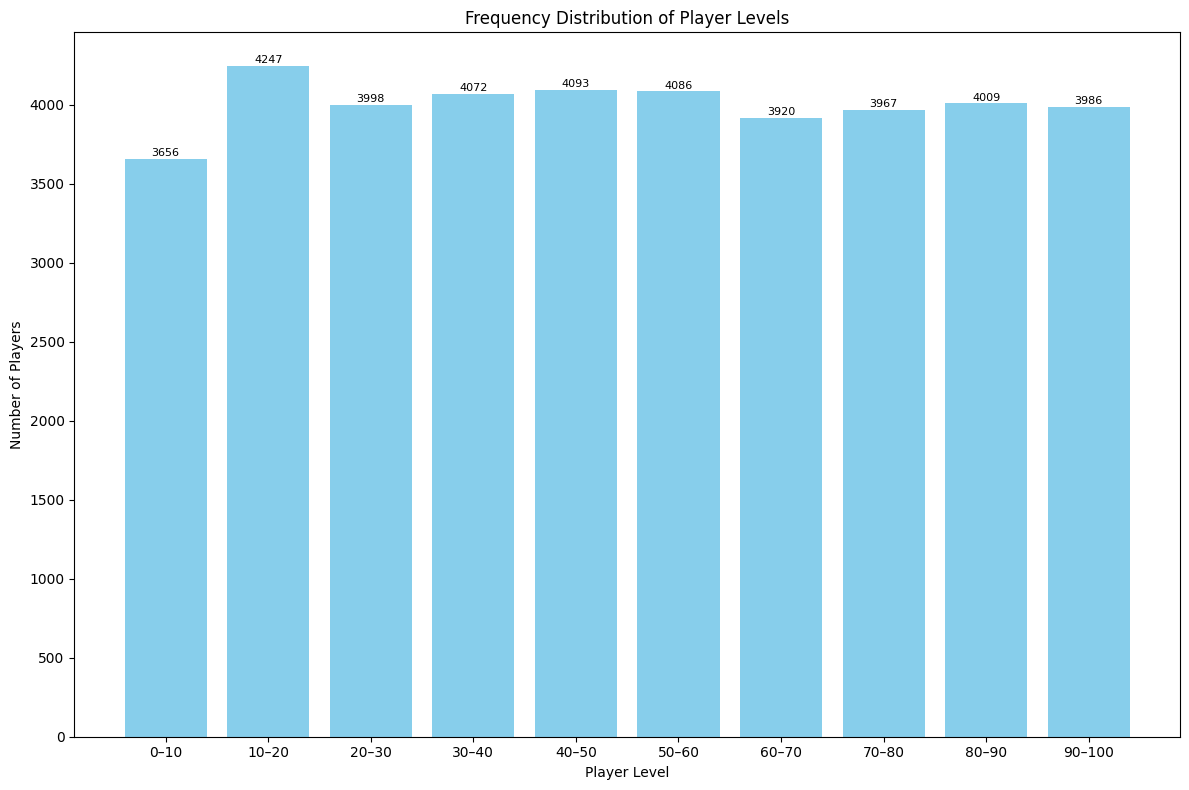

In [18]:
bin_step = 10
bins = np.arange(0, df['PlayerLevel'].max() + bin_step, bin_step)
df['PlayerLevel_bin'] = pd.cut(df['PlayerLevel'], bins=bins, right=False, include_lowest=True)

# Frequency table (no treatment grouping)
freq = df['PlayerLevel_bin'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 8))
plt.bar(freq.index.astype(str), freq.values, color='skyblue', width=0.8)

# Format bin labels
bin_labels = [f'{int(b.left)}–{int(b.right)}' for b in freq.index]
plt.xticks(range(len(freq)), bin_labels, rotation=0, ha='center')

# Titles and labels
plt.title('Frequency Distribution of Player Levels')
plt.xlabel('Player Level')
plt.ylabel('Number of Players')

# Add value labels on top of bars
for i, val in enumerate(freq.values):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [19]:
users_per_achievementsUnlocked = (
    df.groupby('AchievementsUnlocked')['PlayerID']
    .nunique() # Counts the number of unique User IDs in each Treatment group
)

print(users_per_achievementsUnlocked)

AchievementsUnlocked
0     810
1     807
2     798
3     823
4     777
5     788
6     798
7     794
8     840
9     775
10    800
11    750
12    793
13    800
14    809
15    790
16    793
17    780
18    842
19    790
20    806
21    825
22    824
23    805
24    771
25    797
26    793
27    774
28    789
29    799
30    797
31    807
32    870
33    793
34    798
35    796
36    821
37    788
38    774
39    842
40    837
41    811
42    762
43    790
44    790
45    805
46    794
47    809
48    837
49    773
Name: PlayerID, dtype: int64


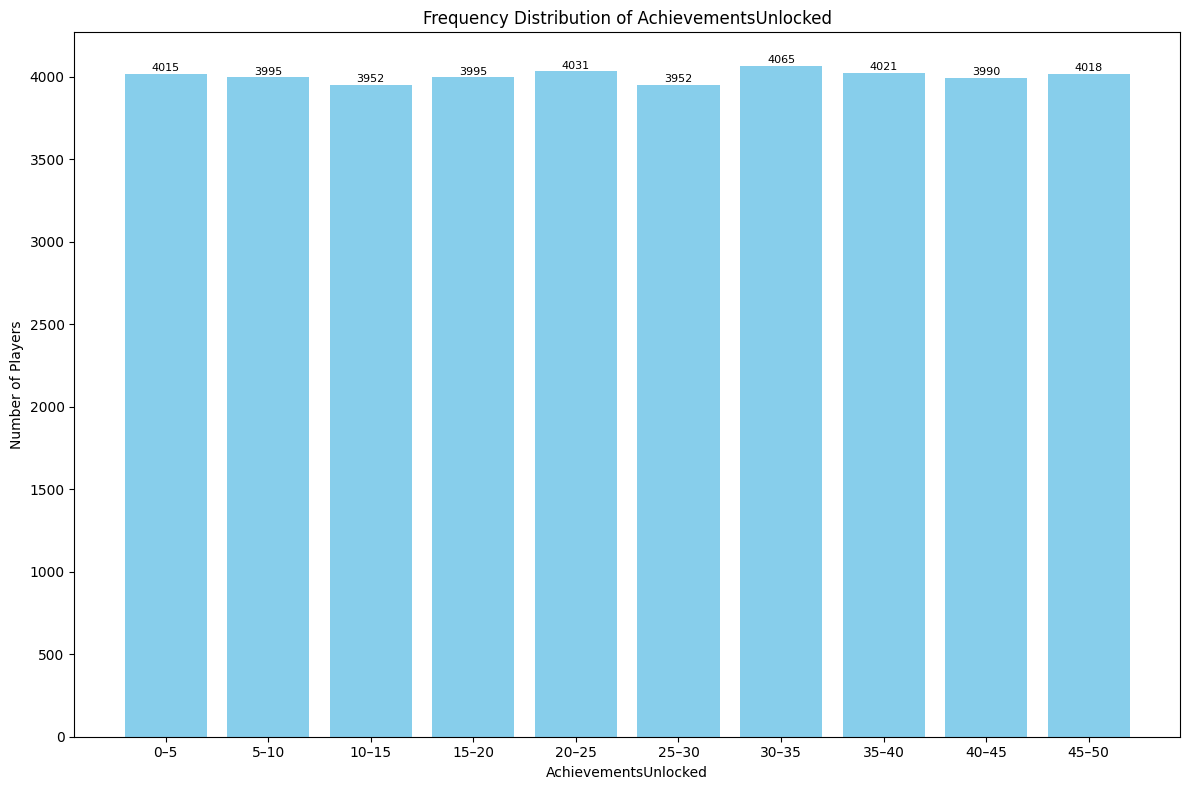

In [20]:
bin_step = 5
bins = np.arange(0, df['AchievementsUnlocked'].max() + bin_step, bin_step)
df['AchievementsUnlocked_bin'] = pd.cut(df['AchievementsUnlocked'], bins=bins, right=False, include_lowest=True)

# Frequency table (no treatment grouping)
freq = df['AchievementsUnlocked_bin'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 8))
plt.bar(freq.index.astype(str), freq.values, color='skyblue', width=0.8)

# Format bin labels
bin_labels = [f'{int(b.left)}–{int(b.right)}' for b in freq.index]
plt.xticks(range(len(freq)), bin_labels, rotation=0, ha='center')

# Titles and labels
plt.title('Frequency Distribution of AchievementsUnlocked')
plt.xlabel('AchievementsUnlocked')
plt.ylabel('Number of Players')

# Add value labels on top of bars
for i, val in enumerate(freq.values):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [21]:
import seaborn as sns

/tmp/ipython-input-2030516940.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GameDifficulty', y='PlayTimeHours', data=df, palette='pastel')


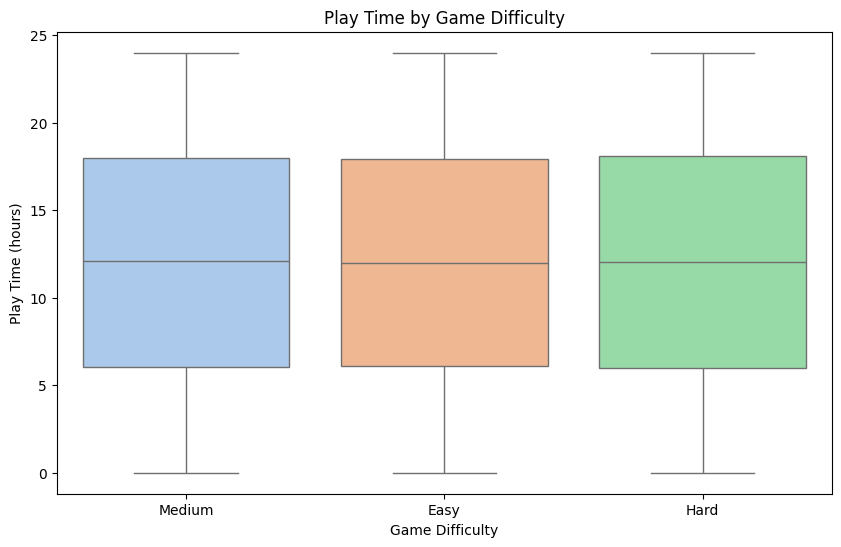

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='GameDifficulty', y='PlayTimeHours', data=df, palette='pastel')
plt.title('Play Time by Game Difficulty')
plt.xlabel('Game Difficulty')
plt.ylabel('Play Time (hours)')
plt.show()

/tmp/ipython-input-1826311638.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='InGamePurchases', y='PlayTimeHours', data=df, palette='coolwarm')


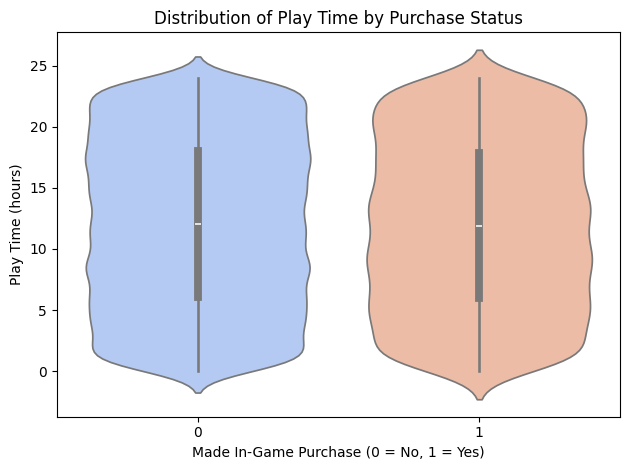

In [23]:
sns.violinplot(x='InGamePurchases', y='PlayTimeHours', data=df, palette='coolwarm')
plt.title('Distribution of Play Time by Purchase Status')
plt.xlabel('Made In-Game Purchase (0 = No, 1 = Yes)')
plt.ylabel('Play Time (hours)')
plt.tight_layout()
plt.show()

The width of each violin reflects the density (how many players fall at a given playtime). The distribution shape is wider at higher playtime values for the “1 = Yes” group

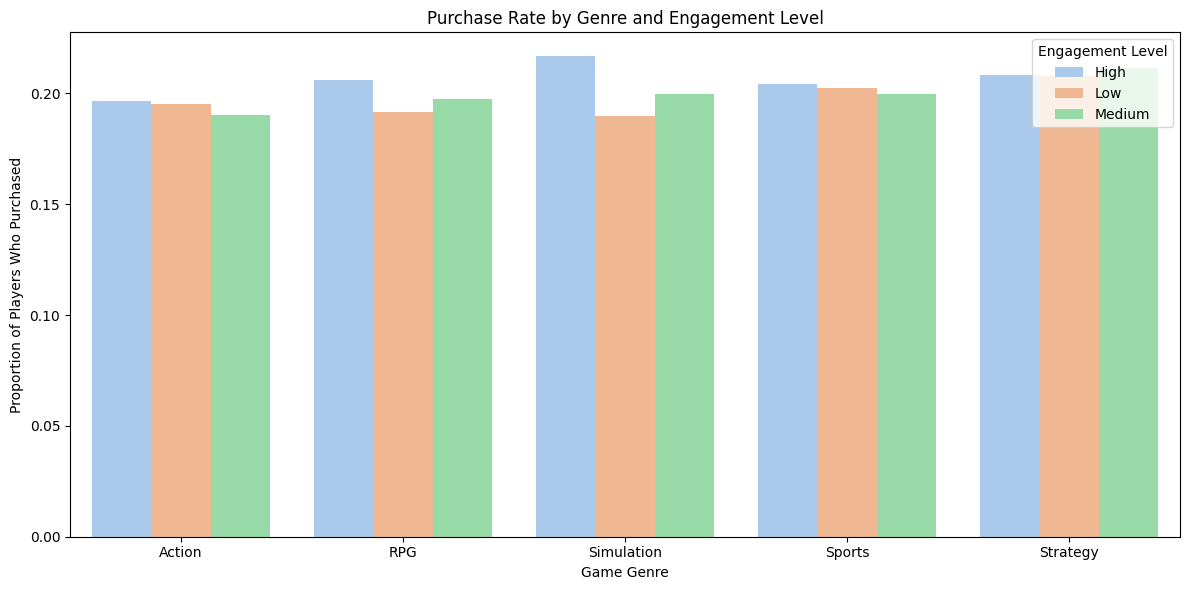

In [24]:
purchase_interaction = (
    df.groupby(['GameGenre', 'EngagementLevel'])['InGamePurchases']
      .mean()
      .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(
    x='GameGenre', y='InGamePurchases', hue='EngagementLevel',
    data=purchase_interaction, palette='pastel'
)
plt.title('Purchase Rate by Genre and Engagement Level')
plt.xlabel('Game Genre')
plt.ylabel('Proportion of Players Who Purchased')
plt.legend(title='Engagement Level')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

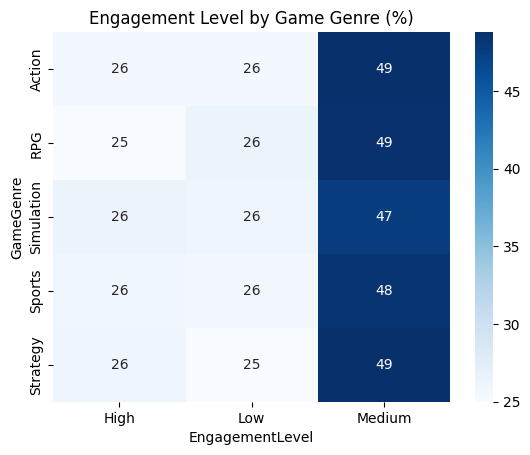

In [25]:
heatmap_data = pd.crosstab(df['GameGenre'], df['EngagementLevel'], normalize='index') * 100
sns.heatmap(heatmap_data, annot=True, cmap='Blues')
plt.title('Engagement Level by Game Genre (%)')
plt.show() #It's my qualitative exploration since this dataset doesn't have comments.

1. The average player age is about 32 years, and the mean playtime is roughly 12 hours, with high variability (SD ≈ 6.9), suggesting a mix of casual and highly engaged players.
2. The majority of players did not make in-game purchases (≈ 80%), though those who did typically showed higher playtime (Violin Plot), indicating that financial investment correlates with deeper engagement.
3. Sessions per week are fairly evenly spread (1–19), as well as achivements unlocked, showing diverse gaming habits without extreme clustering.
4. Purchase rates increase with higher engagement levels across all genres. (Bar graph: Purchase Rate by Genre and Engagement Level)
5. Across all five genres, Medium engagement dominates, representing about 47–49% of players in every category. Action, Strategy, and RPG games show slightly higher shares of High engagement (26%), hinting that these genres might have more loyal or competitive players. (Heatmap)

##3. Inference

##1st Objective. I want to identify the relationship between playtime and in-game purchasing behaviors.

*   H01: There is no difference in average playtime between players who made an in-game purchase and those who did not. Purchasing behavior is not associated with the amount of time players spend in the game.
*   Type 1 Error: Incorrectly reject the mull hypothesis. The error occurs when we conclude that purchasing players spend more/less time in gaming while, in reality, there is no difference.
*   Type 2 Error: We failed to detect a real difference in play time between purchasing and non-purchasing players.
*   Type of the inference test: t-test/u-test. Will perform Shapiro-Wilk test to determine.
*   Power = 0.8; Statistical significance level = 0.05.
*   Minimum Detectable Effect (MDE): 0.25 hours (~15.0 minutes)

  



In [26]:
!pip install -U statsmodels

In [27]:
from statsmodels.stats.power import TTestIndPower

In [28]:
#This cell is from GPT
# Initialize power analysis
analysis = TTestIndPower()

# Given parameters
alpha = 0.05        # significance level
power = 0.80        # desired power
n1 = 8041           # purchasers
n2 = 31993          # non-purchasers
sd = 6.9146         # standard deviation of PlayTimeHours

# Compute group ratio
ratio = n2 / n1

# Find MDE iteratively (difference in means)
for diff in np.arange(0, 1, 0.01):  # try 0 to 1 hour differences
    effect_size = diff / sd  # Cohen's d
    calc_power = analysis.power(effect_size=effect_size,
                                nobs1=n1, alpha=alpha,
                                ratio=ratio, alternative='two-sided')
    if calc_power >= power:
        print(f'Minimum Detectable Effect (MDE): {diff:.2f} hours (~{diff*60:.1f} minutes)')
        break

Minimum Detectable Effect (MDE): 0.25 hours (~15.0 minutes)


In [29]:
mean_playtime = df.groupby('InGamePurchases')['PlayTimeHours'].mean()

print('Mean Play Time (hours) by Purchase Status:')
print(mean_playtime)

Mean Play Time (hours) by Purchase Status:
InGamePurchases
0    12.045395
1    11.940694
Name: PlayTimeHours, dtype: float64


In [30]:
from scipy import stats

In [31]:
purchasers = df.loc[df['InGamePurchases'] == 1, 'PlayTimeHours']
non_purchasers = df.loc[df['InGamePurchases'] == 0, 'PlayTimeHours']

In [32]:
t_stat, p_value = stats.ttest_ind(purchasers, non_purchasers, equal_var=False)

print(f'\nT-statistic: {t_stat:.3f}')
print(f'P-value: {p_value:.3e}')


T-statistic: -1.215
P-value: 2.243e-01


Not statistically significant to reject H01.

In [33]:
# Test for normality using the Shapiro-Wilk test
shapiro_purchasers = stats.shapiro(purchasers)
shapiro_non_purchasers = stats.shapiro(non_purchasers)

print('Shapiro-Wilk Test for  Purchasers:')
print(f'Statistic: {shapiro_purchasers.statistic:.3f}, P-value: {shapiro_purchasers.pvalue:.3f}')

print('Shapiro-Wilk Test for Non Purchasers:')
print(f'Statistic: {shapiro_non_purchasers.statistic:.3f}, P-value: {shapiro_non_purchasers.pvalue:.3f}')

Shapiro-Wilk Test for  Purchasers:
Statistic: 0.956, P-value: 0.000
Shapiro-Wilk Test for Non Purchasers:
Statistic: 0.955, P-value: 0.000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8041.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 31993.
  res = hypotest_fun_out(*samples, **kwds)


P-value < .05. Not normally distributed. Use u-test.

In [34]:
u_stat, u_p_value = stats.mannwhitneyu(purchasers, non_purchasers, alternative='two-sided')
print(f'Mann-Whitney U statistic: {u_stat:.3f}')
print(f'P-value: {u_p_value:.3e}')

Mann-Whitney U statistic: 127506345.000
P-value: 2.261e-01


P-value > .05. Not statistically significant to reject H01.

There is no significant difference in playtime between players who made an in-game purchase and those who did not. However, the effect size is smaller than the minimum detectable effect (MDE) (<.25 hr), meaning even if a real difference exists, it’s so small that it’s statistically undetectable with this dataset.

*   Type I Error (alpha = 0.05): If we wrongly reject H01, we’d claim that playtime and purchasing behavior are associated when they're not. Risk level = 5%.
*   Type II Error (beta = 0.20): If we fail to detect a true difference, we risk overlooking a subtle relationship between purchasing and playtime. Power = 0.80, so 20% chance of missing a real small effect.



Playtime alone doesn’t distinguish between those who spend money and those who don’t. In-game purchases may be influenced more by other factors (e.g., game design, emotional engagement), not just how long someone plays. This suggests that simply increasing total playtime won’t necessarily increase spending. Players who enjoy short but intense sessions may be just as likely to buy. Instead of pushing for longer sessions, innovation should focus on what happens within playtime, possibly improving the quality of engagement.

The median of the playtime among the two purchasing groups are slightly different, and I would like to say if the difference is statistically significant. The difference in mean valus is also very small. ~.1 hour. The u-test indicates the difference is ignorable. The tests did a cross validation on the relationship between playtime and purchasing behaviors.

##2nd Objective. I want to identify the relationship between engagement level/ retention and in-game purchasing behaviors.

*   H02: There is no difference in purchase rate among High, Medium, and Low engagement level.
*   Type 1 Error: Incorrectly reject the mull hypothesis. The error occurs when we conclude that the purchasing rate differs at at least one engagement level while, in fact, purchase rate is not associated with engagement level.
*   Type 2 Error: We failed to detect a real association between purchase rate and engagement level.
*   Type of the inference test: Chi-square Test
*   Power = 0.8; Statistical significance level = 0.05.
*   MDE for Low vs Medium: 1.61 percentage points
*   MDE for Low vs High: 1.84 percentage points
*   MDE for Medium vs High: 1.61 percentage points

In [35]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

In [36]:
#This box is from GPT
# Initialize power analysis object
analysis = NormalIndPower()

# Parameters
alpha = 0.05 / 3   # Bonferroni correction for 3 pairwise comparisons (Low–Med, Low–High, Med–High)
power = 0.80

# Sample sizes by engagement level
group_counts = df['EngagementLevel'].value_counts()
n_low = group_counts.get('Low', 0)
n_med = group_counts.get('Medium', 0)
n_high = group_counts.get('High', 0)

# Overall baseline purchase rate
p1 = df['InGamePurchases'].mean()

# Function to compute MDE for two groups
def compute_mde(n1, n2, p1, alpha, power):
    for p2 in np.arange(p1, p1 + 0.05, 0.0001):  # search up to +5 percentage points
        es = proportion_effectsize(p1, p2)
        calc_power = analysis.power(effect_size=es, nobs1=n1, alpha=alpha, ratio=n2/n1)
        if calc_power >= power:
            return round((p2 - p1) * 100, 2)  # percentage-point difference
    return None

# Compute pairwise MDEs
pairs = [('Low','Medium', n_low, n_med),
         ('Low','High',   n_low, n_high),
         ('Medium','High',n_med, n_high)]

for a,b,n1,n2 in pairs:
    mde = compute_mde(n1, n2, p1, alpha, power)
    print(f'MDE for {a} vs {b}: {mde} percentage points')

MDE for Low vs Medium: 1.61 percentage points
MDE for Low vs High: 1.84 percentage points
MDE for Medium vs High: 1.61 percentage points


In [37]:
purchase_rate = (
    df.groupby('EngagementLevel')['InGamePurchases']
      .mean()
      .sort_index() * 100)

print('Purchase Rate by Engagement Level (%):')
print(purchase_rate)

Purchase Rate by Engagement Level (%):
EngagementLevel
High      20.646285
Low       19.730725
Medium    19.975225
Name: InGamePurchases, dtype: float64


In [38]:
from scipy.stats import chi2_contingency

In [39]:
contingency = pd.crosstab(df['EngagementLevel'], df['InGamePurchases'])

# Display the table
print('Contingency Table:')
print(contingency)

# Run the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency)

# Print results
print('\nChi-Square Test Results:')
print(f'Chi-square statistic: {chi2:.3f}')
print(f'Degrees of freedom: {dof}')
print(f'P-value: {p:.5f}')

Contingency Table:
InGamePurchases      0     1
EngagementLevel             
High              8202  2134
Low               8287  2037
Medium           15504  3870

Chi-Square Test Results:
Chi-square statistic: 2.981
Degrees of freedom: 2
P-value: 0.22522


p = 0.225 > 0.05, fail to reject H0

There is no significant difference in puchasing rate between players at different engagement level. purchase behavior appears independent of engagement level. However, the effect size is smaller than the minimum detectable effect (MDE) (<1.61 hr), meaning even if a real difference exists, it’s too small to be confidently detected.

*   Type I Error (alpha = 0.05): If we wrongly reject H01, we’d claim that purchasing behavior and retention rate are associated when they're not. Risk level = 5%.
*   Type II Error (beta = 0.20): If we fail to detect a true difference, we risk overlooking a subtle relationship between purchasing behavior and engagement level. Power = 0.80, so 20% chance of missing a real small effect.


Engagement level alone doesn’t distinguish between those who spend money and those who don’t. Efforts to increase spending shouldn’t rely solely on retention mechanics. (More player sessions). Designers should explore other behavioral or emotional triggers, like special events, social competition, or personalized offers, to convert engagement into purchases.

The heatmap shows that across all game genres (Action, RPG, Simulation, Sports, and Strategy), the “Medium” engagement level consistently dominates, making up around 47–49% of players in each genre. This distribution suggests that most players remain moderately engaged, regardless of the genre. The consistency across genres may mean that engagement is more a function of player habit than of game mechanics. The qualitative consistency supports the statistical finding that engagement and purchasing behavior are largely independent. The promotion may need to target motivational factors, instead of assuming the retension rate will natrually drive profitability.

##4. Dashboard

In [ ]:
print('MADE A CHANGE')

Made a change


In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [41]:
df["Purchaser"] = df["InGamePurchases"].map({0: "Non-Purchaser", 1: "Purchaser"})

In [ ]:
#GPT used to create this dashboard
# === Statistical summary (your results) ===
p_value = 0.225
mde_hours = 0.25  # ~15 minutes
chi_p_value = 0.225

# === Create 2x2 dashboard ===
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Playtime Distribution by Purchase Status",
        "Playtime vs Player Level",
        "Purchase Rate by Engagement Level",
        "Summary of Statistical Tests"
    ),
    specs=[[{}, {}], [{"colspan": 2}, None]],  # bottom row spans full width
    vertical_spacing=0.15
)

# --- Box Plot (Playtime vs Purchase) ---
fig.add_trace(
    go.Box(
        x=df["Purchaser"],
        y=df["PlayTimeHours"],
        boxpoints="outliers",
        marker_color="lightblue",
        name="Playtime"
    ),
    row=1, col=1
)

# --- Scatter (Playtime vs Player Level, colored by purchase status) ---
fig.add_trace(
    go.Scatter(
        x=df["PlayTimeHours"],
        y=df["PlayerLevel"],
        mode="markers",
        name="Playtime vs Player Level",
        marker=dict(
            size=6,
            color=df["InGamePurchases"].map({0: "blue", 1: "red"}),  # 🔵 Non-purchasers, 🔴 Purchasers
            opacity=0.6,
            line=dict(width=0.5, color="white")
        ),
        text=df["Purchaser"],  # optional tooltip
        hovertemplate=(
            "Play Time: %{x:.2f} hrs<br>"
            "Player Level: %{y}<br>"
            "Purchase: %{text}"
        )
    ),
    row=1, col=2
)

# Add a manual legend entry
fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=8, color='blue'),
    name='Non-Purchasers'
))
fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=8, color='red'),
    name='Purchasers'
))

# --- Bar (Purchase Rate by Engagement) ---
purchase_rate = (
    df.groupby("EngagementLevel")["InGamePurchases"]
    .mean().reset_index().rename(columns={"InGamePurchases": "PurchaseRate"})
)

# --- Define custom order for x-axis ---
desired_order = ["Low", "Medium", "High"]

fig.add_trace(
    go.Bar(
        x=purchase_rate["EngagementLevel"],
        y=purchase_rate["PurchaseRate"] * 100,
        text=purchase_rate["PurchaseRate"].apply(lambda x: f"{x*100:.1f}%"),
        textposition="outside",
        marker_color="lightgreen",
        name="Purchase Rate"
    ),
    row=2, col=1
)

# --- Apply x-axis order ---
fig.update_xaxes(
    categoryorder='array',
    categoryarray=desired_order,  # 👈 custom order
    title_text="Engagement Level",
    row=2, col=1
)

ymax = (purchase_rate["PurchaseRate"] * 100).max()
fig.update_yaxes(range=[0, 25], row=2, col=1)

# --- Layout settings ---
fig.update_layout(
    height=1100,
    width=1800,
    title_text="🎮 Gaming Behavior Dashboard — Key Visualizations & Test Conclusions",
    showlegend=False,
    margin=dict(t=100, b=160)
)
fig.update_xaxes(title_text="Purchase Status", row=1, col=1)
fig.update_yaxes(title_text="Playtime (hours)", row=1, col=1)
fig.update_xaxes(title_text="Playtime (hours)", row=1, col=2)
fig.update_yaxes(title_text="Player Level", row=1, col=2)
fig.update_xaxes(title_text="Engagement Level", row=2, col=1)
fig.update_yaxes(title_text="Purchase Rate (%)", row=2, col=1)

fig.show()

**Playtime Distribution by Purchase Status (Top-Left Box Plot)**

What it shows: The distribution of playtime hours among players who made in-game purchases vs. those who didn’t.

Interpretation: The two boxes overlap almost completely, indicating that purchasers and non-purchasers spend roughly the same amount of time playing.

**Playtime × Player Level Scatter (Top-Right)**

What it shows: Each dot is a player.
X-axis: Play Time (hours)
Y-axis: Player Level
Color: Purchase status (Red: purchasers; Blue: non-purchasers)

Interpretation: Red and blue points are intermixed, showing no clear separation or trend. Both groups reach similar levels regardless of spending. Playtime alone does not predict purchase behavior.

Innovation meaning: Simply increasing playtime is not an effective monetization lever; game design should instead focus on engagement quality (storyline depth, reward pacing)

**Purchase Rate by Engagement Level (Bottom Bar Chart)**

What it shows: The proportion of players who made a purchase within each engagement tier (Low, Medium, and High).

Interpretation: Purchase rates are very close (~20 % across all tiers).
The chi-square test (p = 0.225) confirms there’s no statistically significant association between engagement level and purchasing.

Risk:

Engagement is measured as retention rate, which may not fully capture emotional involvement or satisfaction

##5. Contrast with an AI Tool

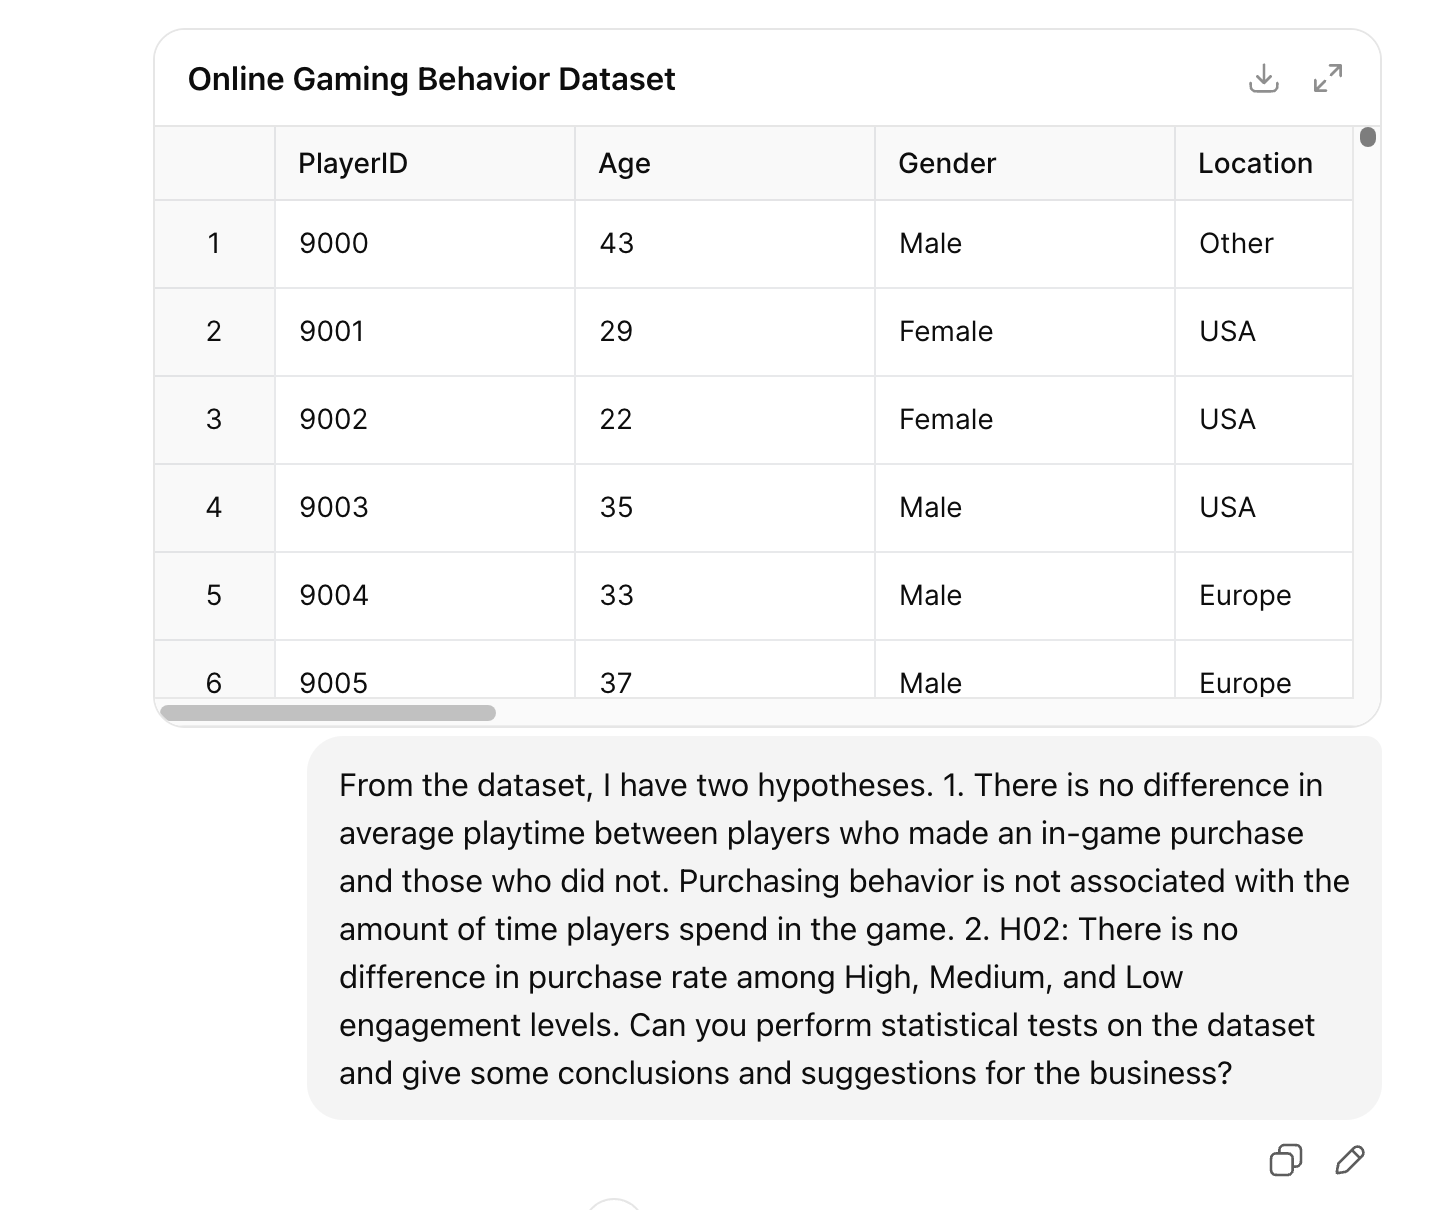





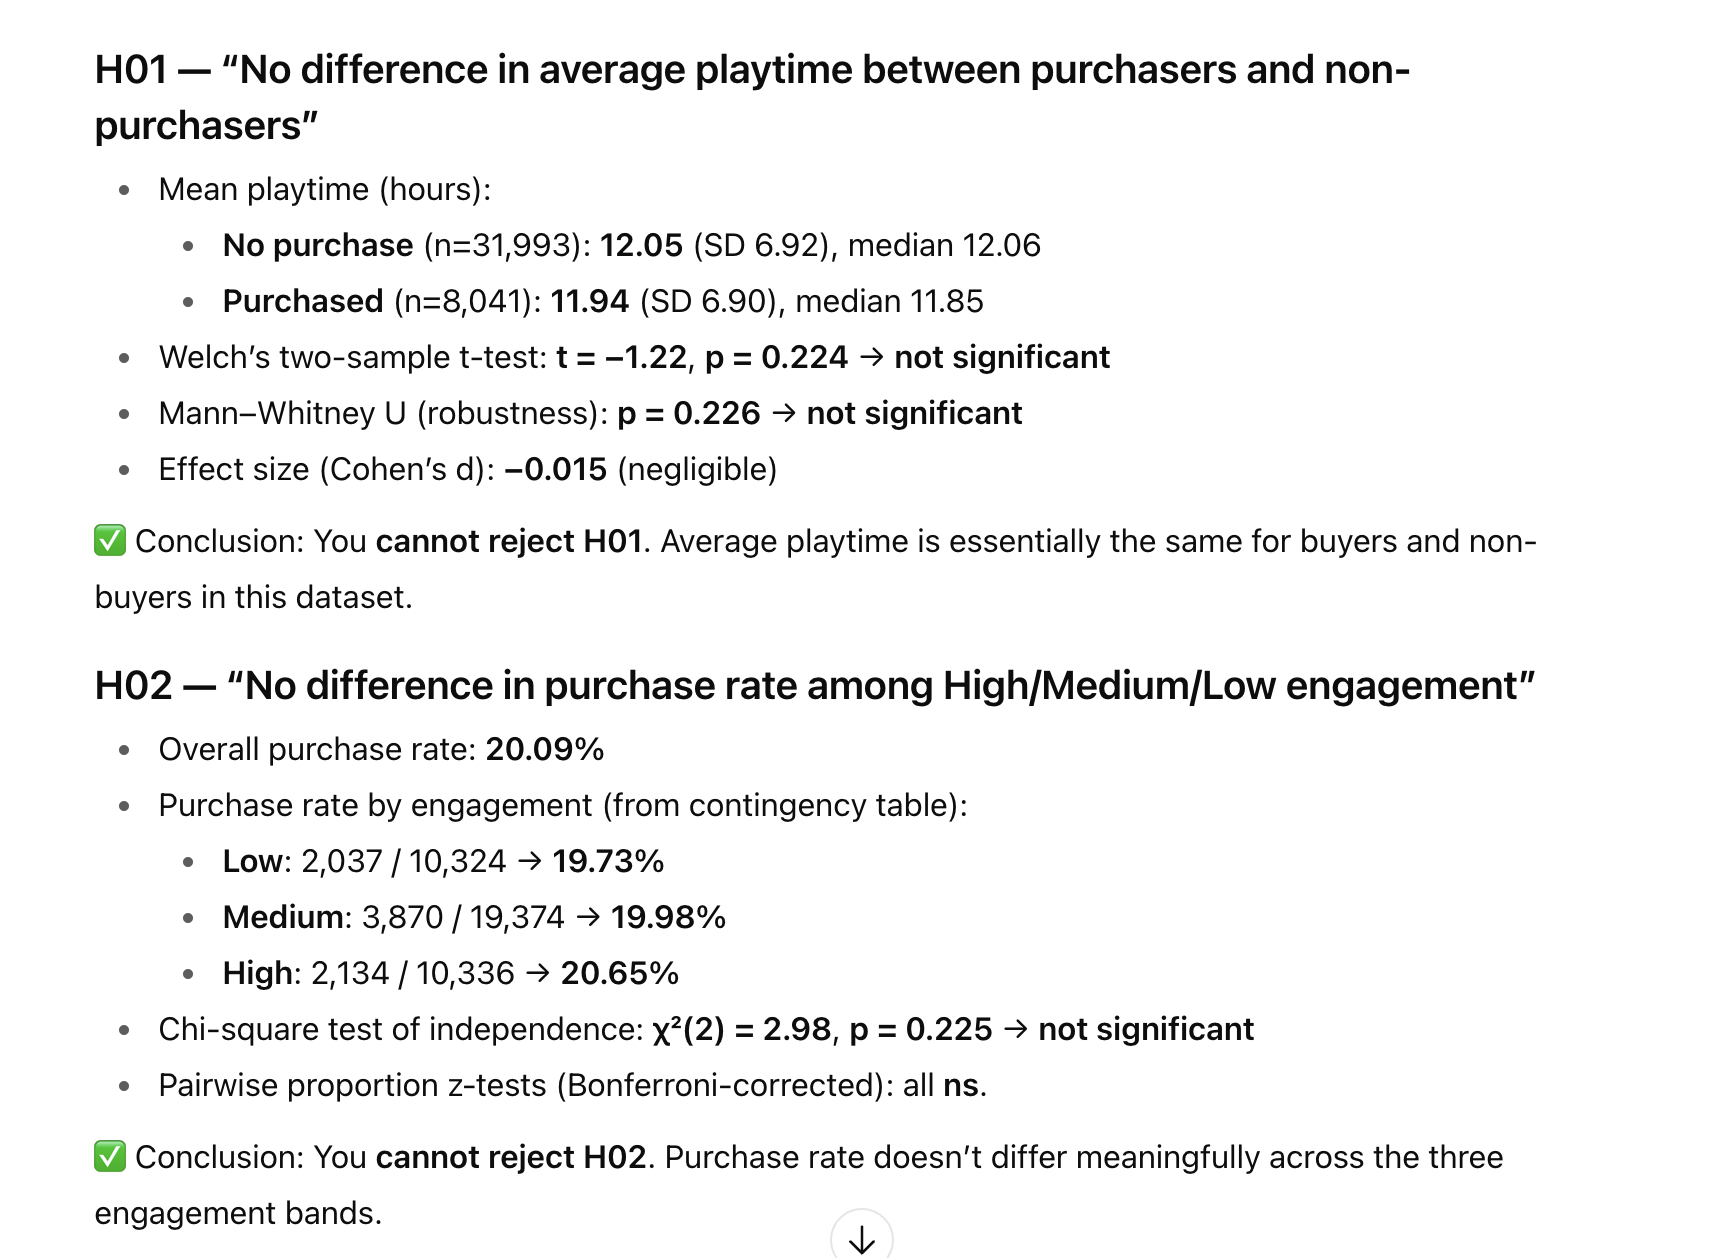

When I explicitly asked the LLM to perform statistical test, it was able to pick the correct methods and do the calculation. The conclusion from the tests is also accurate. It can be used as a cross-validation with the result in python. Still, the LLM can't generate stable and accurate statistical visualizations. The visualization in python can complement. Also, the LLM model didn't provide insights for the business in the first round. It usually needs more context to give suggestions for stakeholders.